In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mukeshkumar07777","key":"822efd3bcd98dc52a9dee568cef854be"}'}

In [3]:
! mkdir ~/.kaggle


In [4]:
!cp kaggle.json ~/.kaggle/


In [5]:
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle dataset list


usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [7]:
!kaggle datasets download -d chetankv/dogs-cats-images


Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images
License(s): CC0-1.0
100% 433M/435M [00:05<00:00, 79.9MB/s]
100% 435M/435M [00:05<00:00, 85.6MB/s]


In [8]:
!unzip dogs-cats-images.zip


Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

In [9]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [11]:
Categories=['cats','dogs']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/dog vs cat/dataset/training_set'
#path which contains all the categories of images
for i in Categories:

	print(f'loading... category : {i}')
	path=os.path.join(datadir,i)
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img))
		img_resized=resize(img_array,(150,150,3))
		flat_data_arr.append(img_resized.flatten())
		target_arr.append(Categories.index(i))
	print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)


loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [12]:
import os
from skimage.io import imread
from skimage.transform import resize
import random

Categories = ['cats', 'dogs']
flat_data_arr = []  # input array
target_arr = []  # output array
datadir = '/content/dog vs cat/dataset/training_set'

for category in Categories:
    print(f'loading... category : {category}')
    path = os.path.join(datadir, category)
    images = os.listdir(path)
    random_images = random.sample(images, 100)  # Selecting 100 random images from each category
    for img in random_images:
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(category))
    print(f'loaded category:{category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)



loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [13]:

#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape


(200, 67501)

In [14]:

#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]


In [16]:

# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [17]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}
# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)


In [18]:

# Training the model using the training data
model.fit(x_train,y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [20]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 35.0% accurate


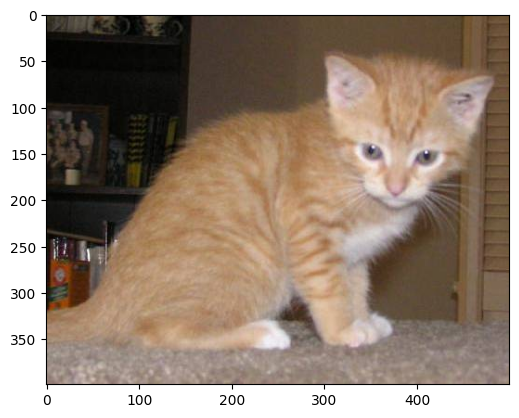

cats = 58.03234820022956%
dogs = 41.967651799770444%
The predicted image is : cats


In [19]:
path='/content/dog vs cat/dataset/test_set/cats/cat.4003.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
	print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])